# Notebooks Imports and packages

In [67]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Example 1 - A simple cost function

## $f(x) = x^2 + x + 1$

In [68]:
def f(x):
     return x**2 + x + 1

In [69]:
#Make data

x_1 = np.linspace(start = -3, stop = 3,num=500)

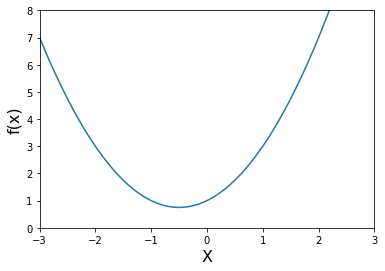

In [70]:
#Plot
plt.xlim([-3,3])
plt.ylim(0,8)
plt.xlabel("X",fontsize=16)
plt.ylabel("f(x)",fontsize=16)
plt.plot(x_1,f(x_1))
plt.show()

## Slope & Derivatives
Challange:- Create a python function for the derivative of $f(x)$ called $df(x)$

In [71]:
def df(x):
    return 2*x + 1

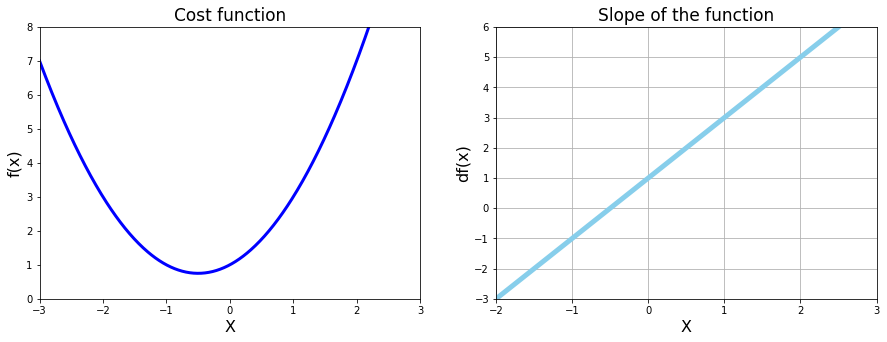

In [72]:
#Plot function and derivative side by side

plt.figure(figsize=[15,5])

# 1 Chart: cost function 
plt.subplot(1,2,1)



plt.xlim([-3,3])
plt.ylim(0,8)
plt.title("Cost function",fontsize=17)
plt.xlabel("X",fontsize=16)
plt.ylabel("f(x)",fontsize=16)
plt.plot(x_1,f(x_1),color='blue',linewidth=3)

#2 Chart: Derivative
plt.subplot(1,2,2)
plt.xlim(-2,3)
plt.ylim(-3,6)
plt.title("Slope of the function",fontsize=17)
plt.xlabel("X",fontsize=16)
plt.ylabel("df(x)",fontsize=16)
plt.grid()
plt.plot(x_1,df(x_1),color='skyblue',linewidth=5)




plt.show()

## Python Loops & Gradient Descent

In [73]:
#Python for Loop
for i in range(5):
    print("Hello world",i)
print("End of Loop")

Hello world 0
Hello world 1
Hello world 2
Hello world 3
Hello world 4
End of Loop


In [74]:
#Python while Loop
counter = 0;
while counter<7:
    print("Counting...",counter)
    counter = counter+1
print("Counting Done.")

Counting... 0
Counting... 1
Counting... 2
Counting... 3
Counting... 4
Counting... 5
Counting... 6
Counting Done.


In [75]:
#Gradient Descent
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.0001


x_list = [new_x]
slope_list = [df(new_x)]


for i in range(500):
    previous_x=new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier*gradient
    
    step_size = abs(new_x-previous_x) 
    #print(step_size)
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    if step_size<precision:
        print("Loop run the",i,"times")
        break
    
print('Local Minimum occurs at:',new_x)
print('Slope or df(x) value at',df(new_x))
print('f(x) value or cost at this point is:',f(new_x))

Loop run the 40 times
Local Minimum occurs at: -0.49962781616118024
Slope or df(x) value at 0.0007443676776395236
f(x) value or cost at this point is: 0.7500001385208099


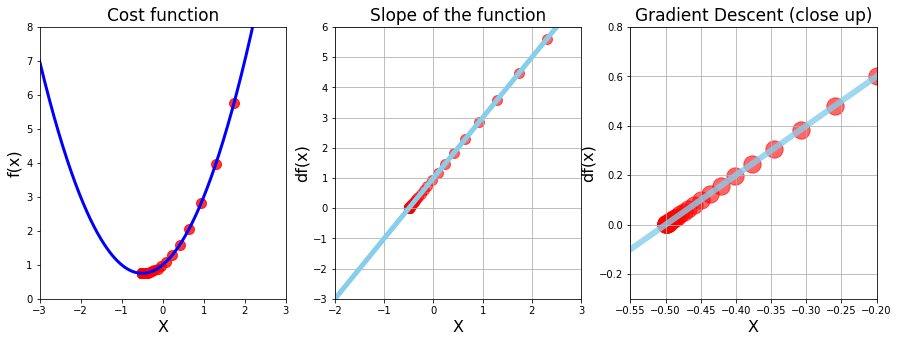

In [76]:
#Superimpose the gradient descent calculation on plot

plt.figure(figsize=[15,5])

# 1 Chart: cost function 
plt.subplot(1,3,1)



plt.xlim([-3,3])
plt.ylim(0,8)
plt.title("Cost function",fontsize=17)
plt.xlabel("X",fontsize=16)
plt.ylabel("f(x)",fontsize=16)
plt.plot(x_1,f(x_1),color='blue',linewidth=3)


values = np.array(x_list)
plt.scatter(x_list,f(values),color='red',s=100,alpha=0.8)

#2 Chart: Derivative
plt.subplot(1,3,2)
plt.xlim(-2,3)
plt.ylim(-3,6)
plt.title("Slope of the function",fontsize=17)
plt.xlabel("X",fontsize=16)
plt.ylabel("df(x)",fontsize=16)
plt.grid()
plt.plot(x_1,df(x_1),color='skyblue',linewidth=5)

plt.scatter(x_list,slope_list,color='red',s=100,alpha=0.6)


#3 Chart: Derivative (Close Up)
plt.subplot(1,3,3)
plt.xlim(-0.55,-0.2)
plt.ylim(-0.3,0.8)
plt.title('Gradient Descent (close up)',fontsize=17)
plt.xlabel("X",fontsize=16)
plt.ylabel("df(x)",fontsize=16)
plt.grid()
plt.plot(x_1,df(x_1),color='skyblue',linewidth=6,alpha=0.8)

plt.scatter(x_list,slope_list,color='red',s=300,alpha=0.6)





plt.show()

# Example 2 - Multiple Minima vs Initial Guess & Advanced Functions

## $$g(x) = x^4 - 4x^2 + 5$$

In [79]:
# Make some data
x_2 = np.linspace(-2,2,1000)
# Challange Write g(x) and dg(x) function in python?
def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 -8*x


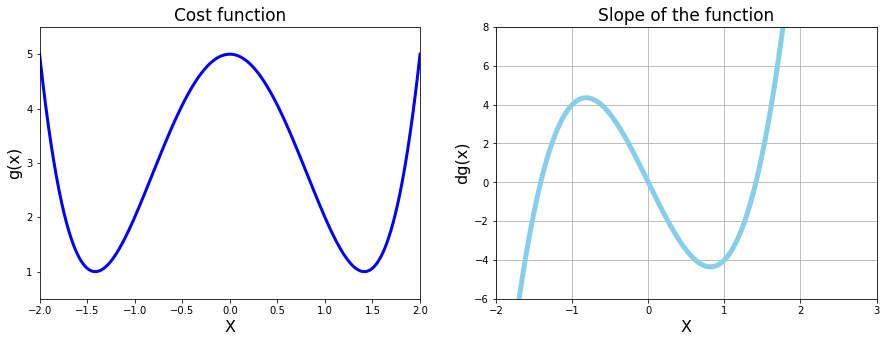

In [80]:
#Plot function and derivative side by side

plt.figure(figsize=[15,5])

# 1 Chart: cost function 
plt.subplot(1,2,1)



plt.xlim(-2,2)
plt.ylim(0.5,5.5)
plt.title("Cost function",fontsize=17)
plt.xlabel("X",fontsize=16)
plt.ylabel("g(x)",fontsize=16)
plt.plot(x_2,g(x_2),color='blue',linewidth=3)

#2 Chart: Derivative
plt.subplot(1,2,2)
plt.xlim(-2,3)
plt.ylim(-6,8)
plt.title("Slope of the function",fontsize=17)
plt.xlabel("X",fontsize=16)
plt.ylabel("dg(x)",fontsize=16)
plt.grid()
plt.plot(x_2,dg(x_2),color='skyblue',linewidth=5)




plt.show()

## Gradient Descent as a Python Function

In [95]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001):

    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for i in range(500):
        previous_x=new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier*gradient

        step_size = abs(new_x-previous_x)

        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))
        if step_size<precision:
            break

    return new_x,x_list,slope_list

In [96]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5,0.02,0.001)
print("Local min occurs at:", local_min)
print("Number of steps:",len(list_x))


Local min occurs at: 1.4122375085019094
Number of steps: 23


In [97]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg,initial_guess=-0.5,multiplier=0.02,precision=0.001)
print("Local min occurs at:", local_min)
print("Number of steps:",len(list_x))


Local min occurs at: -1.4122375085019094
Number of steps: 23


In [98]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg,initial_guess=-0.1)
print("Local min occurs at:", local_min)
print("Number of steps:",len(list_x))


Local min occurs at: -1.4120887490901561
Number of steps: 34


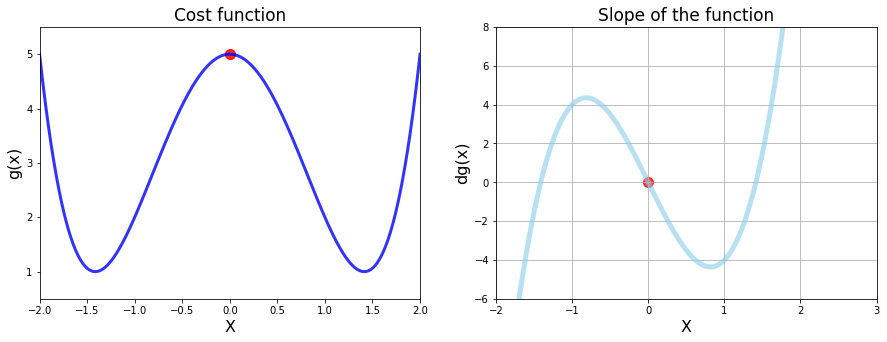

In [109]:
#Calling gradient descent function
local_min, list_x, deriv_list=gradient_descent(derivative_func=dg,initial_guess=0)

#Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15,5])

# 1 Chart: cost function 
plt.subplot(1,2,1)



plt.xlim(-2,2)
plt.ylim(0.5,5.5)
plt.title("Cost function",fontsize=17)
plt.xlabel("X",fontsize=16)
plt.ylabel("g(x)",fontsize=16)
plt.plot(x_2,g(x_2),color='blue',linewidth=3, alpha=0.8)

plt.scatter(list_x,g(np.array(list_x)), color='red', s=100,alpha=0.6)

#2 Chart: Derivative
plt.subplot(1,2,2)
plt.xlim(-2,3)
plt.ylim(-6,8)
plt.title("Slope of the function",fontsize=17)
plt.xlabel("X",fontsize=16)
plt.ylabel("dg(x)",fontsize=16)
plt.grid()
plt.plot(x_2,dg(x_2),color='skyblue',linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list,color="red",s=100,alpha=0.5)




plt.show()

# Example 3 - Divergence, Overflow and Python Tuples

## $$h(x) = x^5 +